In [1]:
import matplotlib.pyplot as plt
import json

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
%matplotlib inline

In [24]:
def json_plot(json_path):
    with open(json_path) as f:
        dat = json.load(f)
    train_loss = dat['train']
    dev_loss = dat['dev']
    x_lim = len(train_loss)
    fig = plt.figure()
    plt.plot(range(1,x_lim+1),train_loss,label='train')
    x_per5 = [ 5*i for i in range(1,len(dev_loss)+1)]
    plt.plot(x_per5,dev_loss,label='dev')
    plt.title(json_path)
    fig.patch.set_alpha(1)
    plt.show()

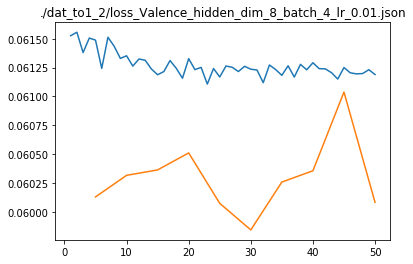

In [26]:
json_plot('./dat_to1_2/loss_Valence_hidden_dim_8_batch_4_lr_0.01.json')

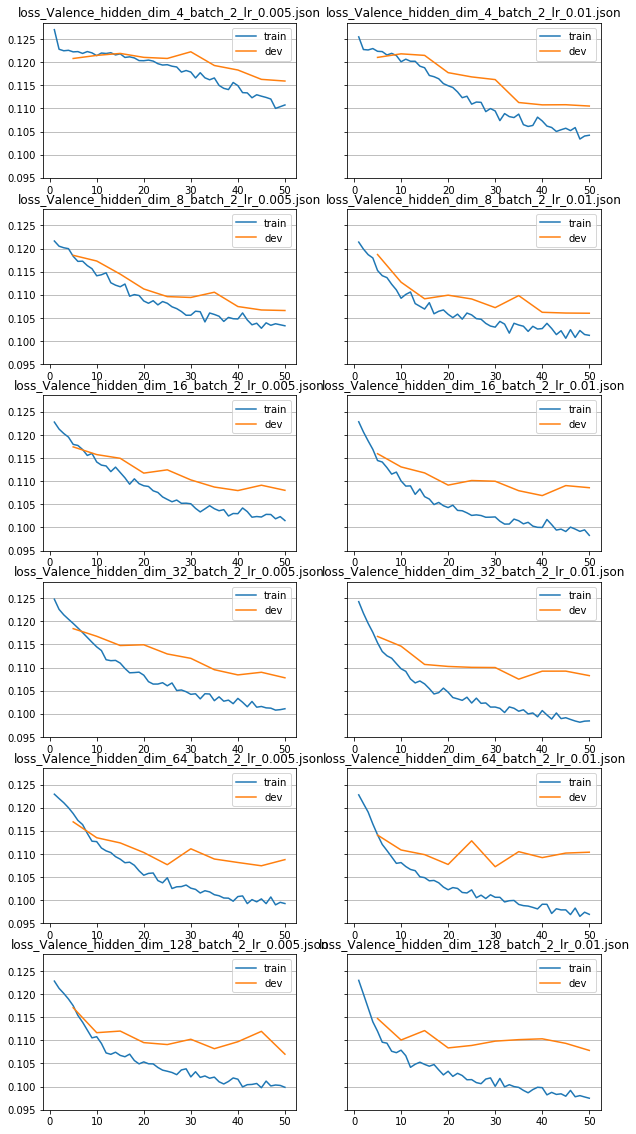

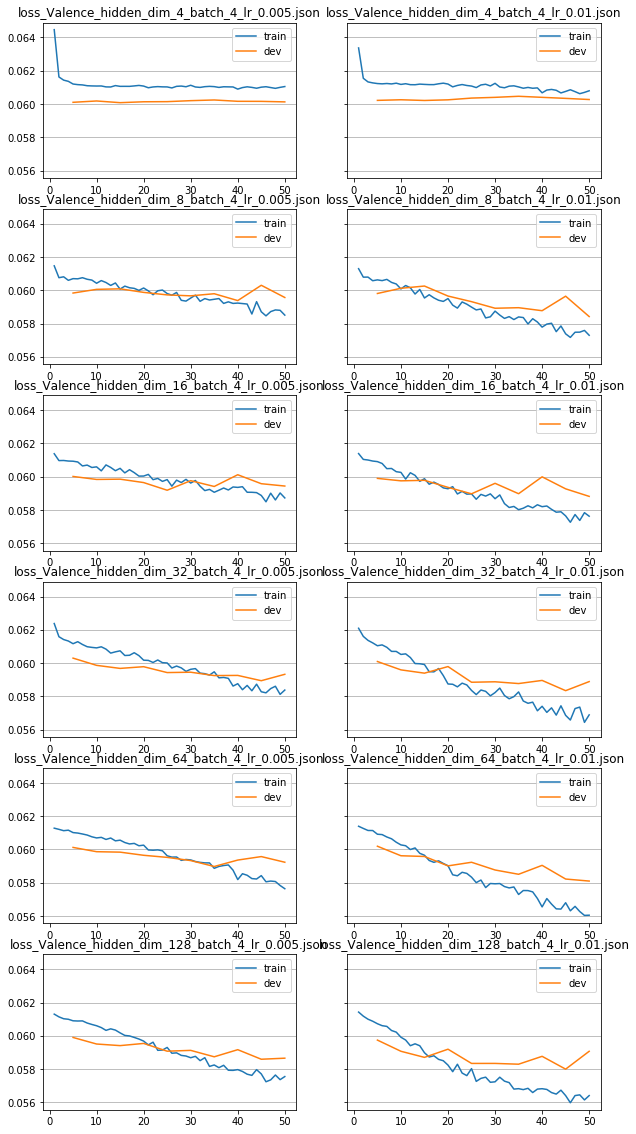

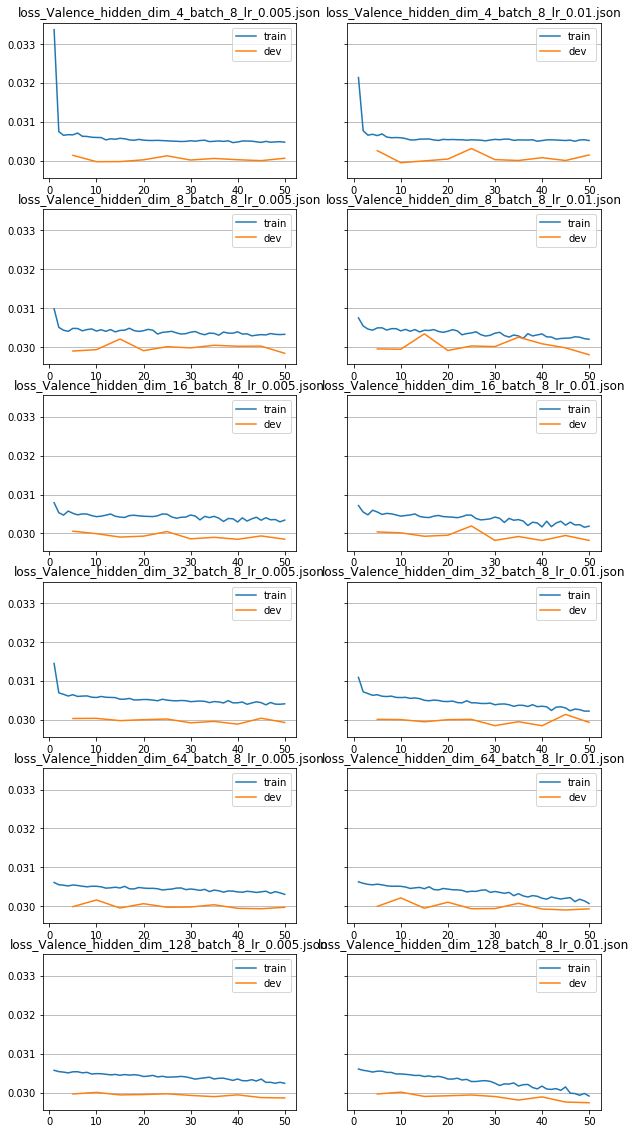

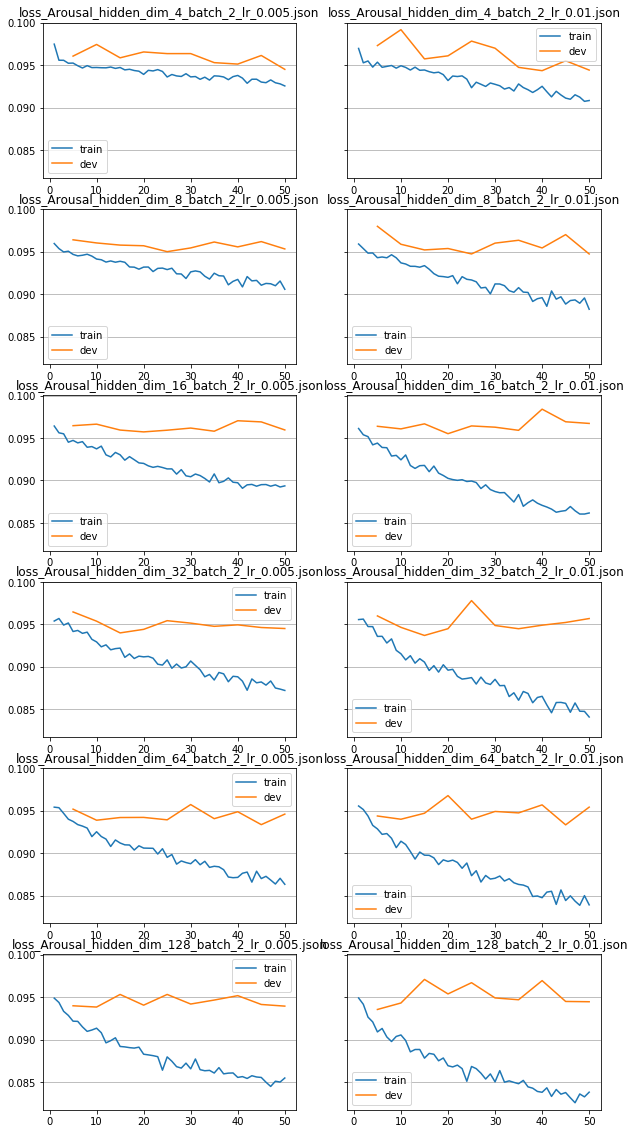

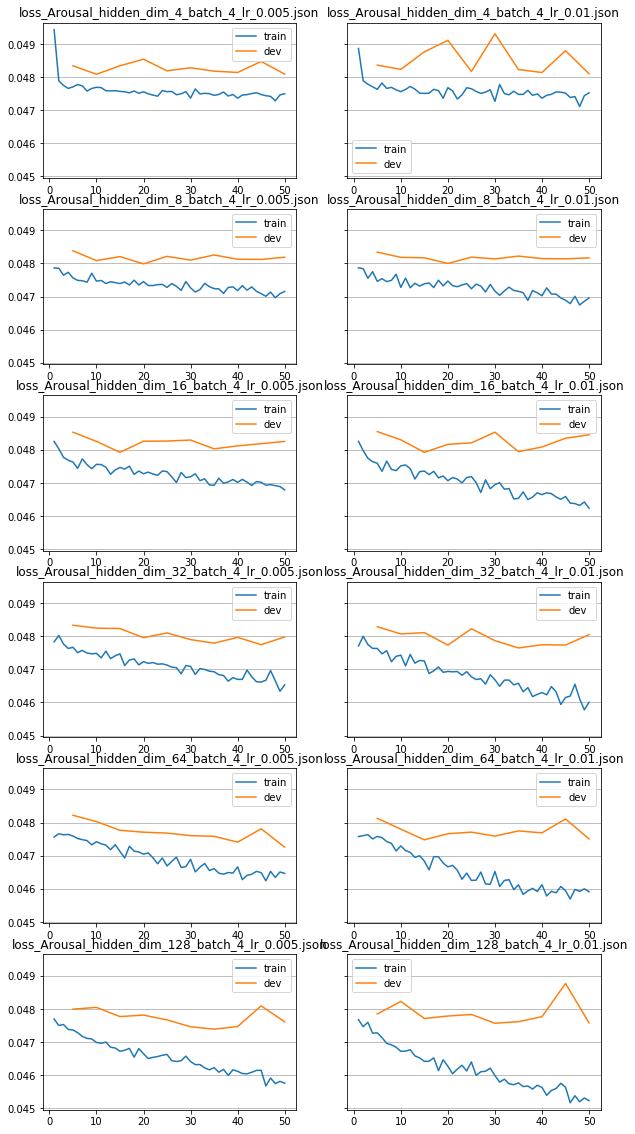

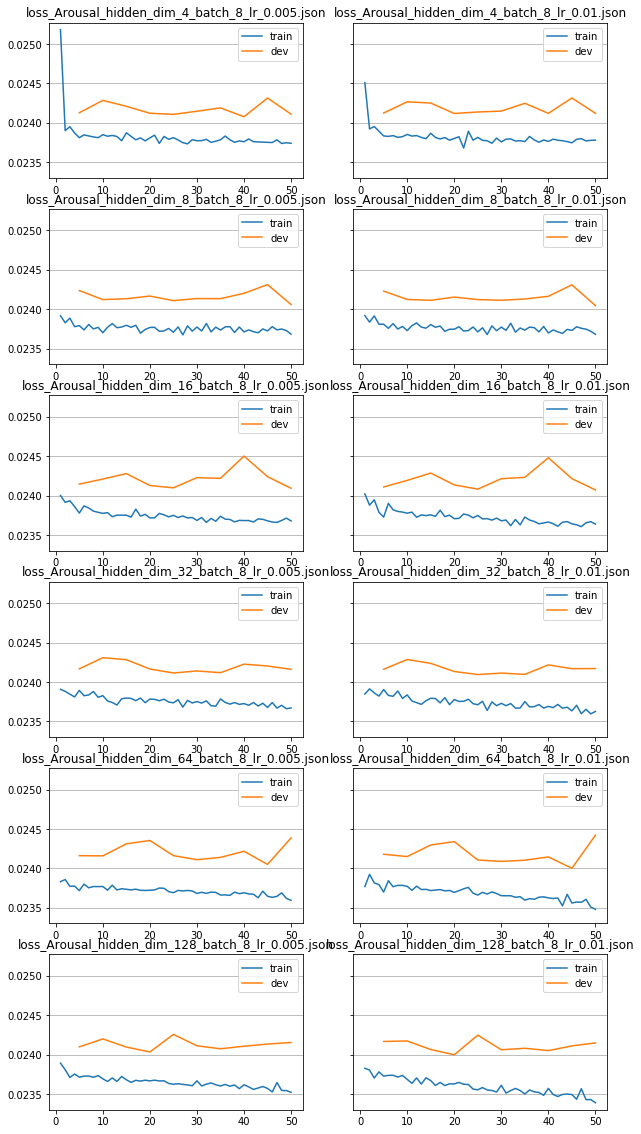

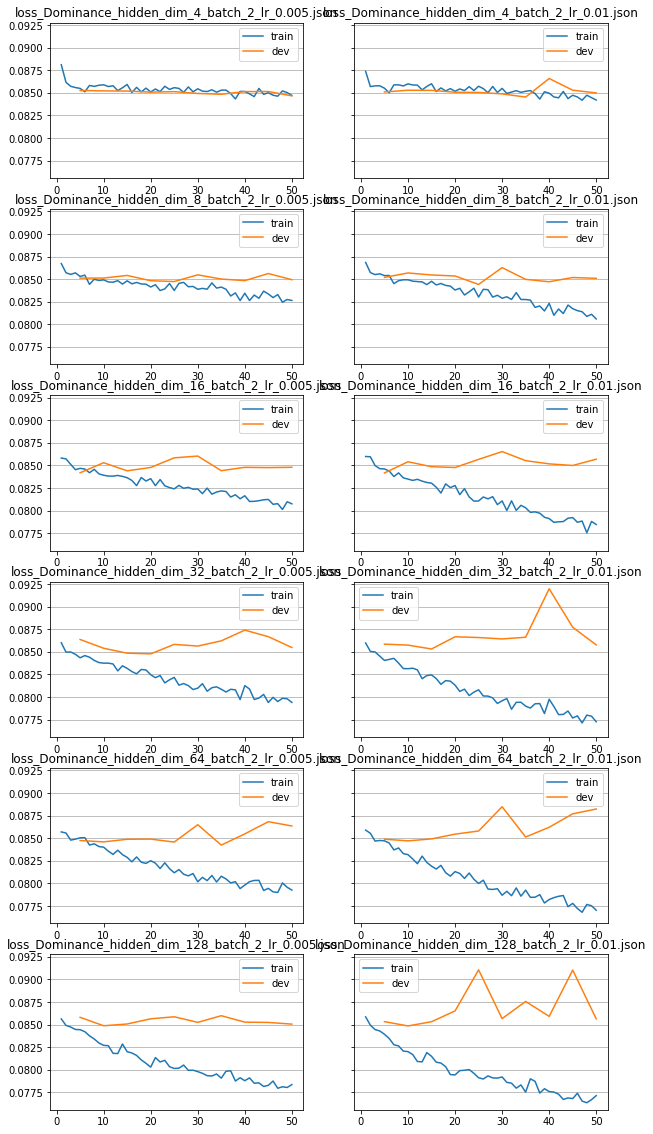

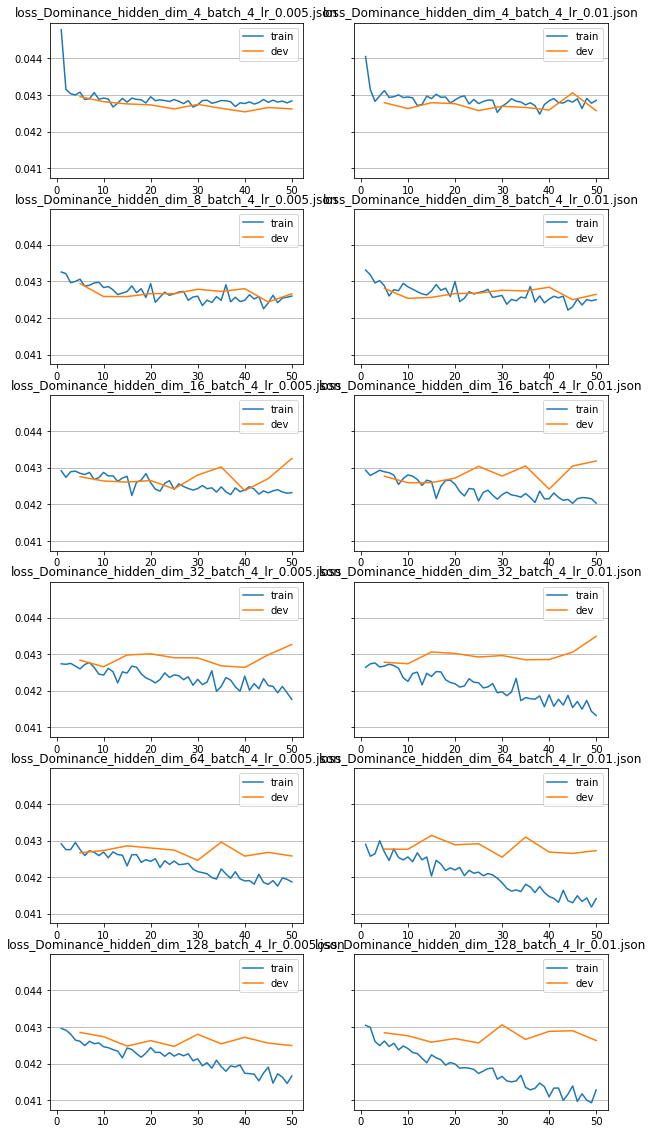

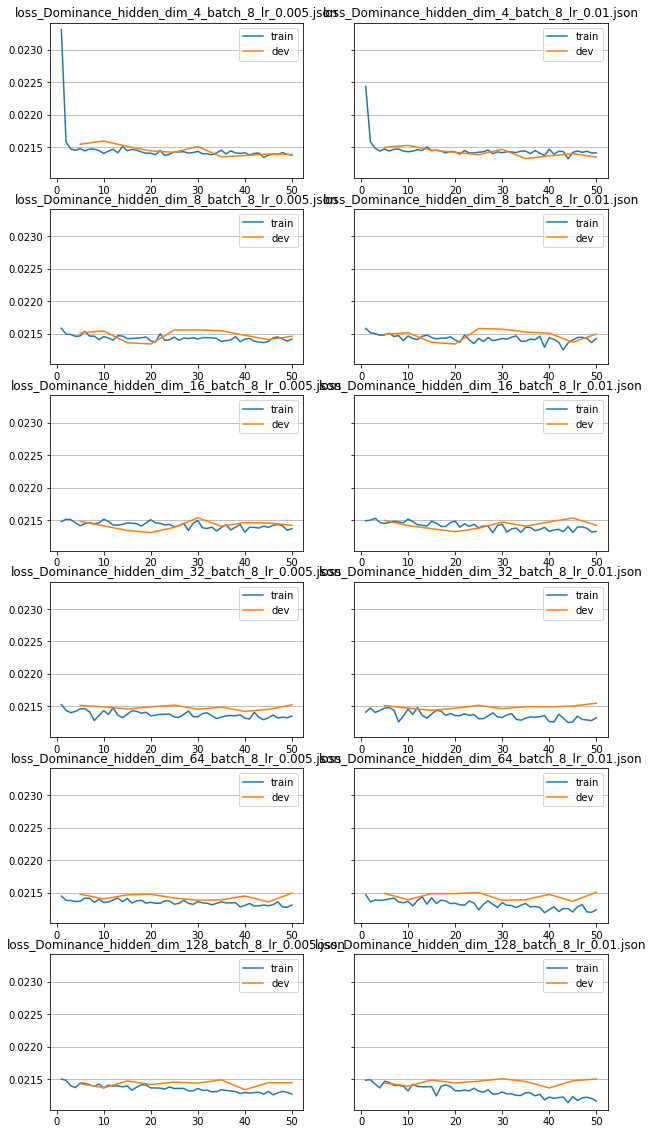

In [8]:
vad_types = ['Valence','Arousal','Dominance']
# vad_types = ['Valence']

for vad_type in vad_types:
    bss = [2,4,8]
    for i in range(3):

        fig, axes = plt.subplots(6, 2, sharey=True, figsize=(10,20))
        fig.patch.set_alpha(1)

        sample = [4,8,16,32,64,128]
        lrs = [0.005,0.01]
        for j in range(2):
            for k in range(6):
                title = "loss_{0}_hidden_dim_{1}_batch_{2}_lr_{3}.json".format(\
                        vad_type,sample[k],bss[i],lrs[j])
                json_path = "./dat_to1_3/" + title
                with open(json_path) as f:
                    dat = json.load(f)
                train_loss = dat['train']
                dev_loss = dat['dev']

                x_lim = len(train_loss)
                x_per5 = [ 5*i for i in range(1,len(dev_loss)+1)]

                ax = axes[k, j]
                ax.plot(range(1,x_lim+1),train_loss)
                ax.plot(x_per5,dev_loss)
                ax.legend(['train','dev'])
                ax.set_title(title)
                ax.grid(True,axis='y')

        fig.savefig('./image/loss_graph_{0}_batch_{1}.png'.format(vad_type,bss[i]))